In [201]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import os
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

os.getcwd()

'c:\\Users\\MINSEOK\\Desktop\\대학생활\\대외활동\\kaggle\\playground-series-s3e22'

In [202]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')


In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [204]:
train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [205]:
num_col=[x  for x in train.columns if np.dtype(train[x])!=object]
cat_col=[x  for x in train.columns if (np.dtype(train[x])==object)]

num_col.remove('id')

<Axes: xlabel='outcome', ylabel='Count'>

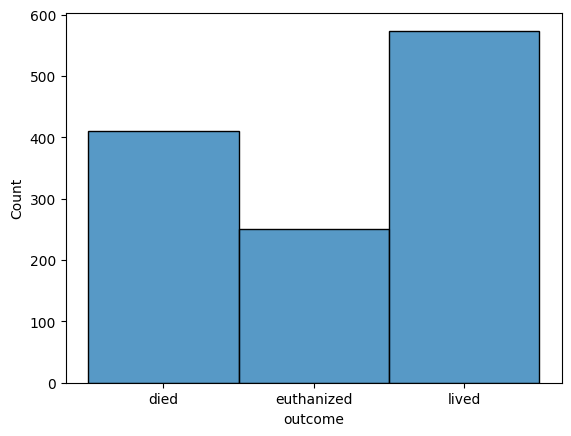

In [206]:
sns.histplot(data=train, x='outcome')

In [207]:
import heapq

null_col=[]
for col in train.columns:
    heapq.heappush(null_col, (col,train[col].isna().sum()))
    
null_col.sort(key=lambda x:-x[1])
null_col

[('abdomen', 213),
 ('rectal_exam_feces', 190),
 ('nasogastric_tube', 80),
 ('peripheral_pulse', 60),
 ('abdomo_appearance', 48),
 ('pain', 44),
 ('temp_of_extremities', 39),
 ('abdominal_distention', 23),
 ('nasogastric_reflux', 21),
 ('mucous_membrane', 21),
 ('peristalsis', 20),
 ('capillary_refill_time', 6),
 ('age', 0),
 ('lesion_1', 0),
 ('cp_data', 0),
 ('nasogastric_reflux_ph', 0),
 ('packed_cell_volume', 0),
 ('abdomo_protein', 0),
 ('lesion_2', 0),
 ('id', 0),
 ('surgery', 0),
 ('rectal_temp', 0),
 ('total_protein', 0),
 ('hospital_number', 0),
 ('surgical_lesion', 0),
 ('pulse', 0),
 ('lesion_3', 0),
 ('respiratory_rate', 0),
 ('outcome', 0)]

In [208]:
train.abdomen.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1230    False
1231    False
1232    False
1233    False
1234    False
Name: abdomen, Length: 1235, dtype: bool

In [209]:
train.loc[train.abdomen.isna(),:]

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
6,6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
9,9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,...,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died
14,14,yes,adult,528134,38.0,124.0,88.0,cool,reduced,bright_red,...,39.0,13.0,serosanguious,6.6,yes,2206,0,0,yes,lived
15,15,no,adult,528305,38.3,44.0,24.0,warm,normal,pale_pink,...,33.0,6.5,cloudy,3.6,no,31110,0,0,yes,lived
16,16,yes,adult,534885,37.8,60.0,16.0,cool,NaN,normal_pink,...,37.0,75.0,NaN,1.0,yes,2208,0,0,no,euthanized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,1213,no,adult,530670,40.3,96.0,36.0,cool,reduced,normal_pink,...,70.0,7.5,serosanguious,4.5,yes,1400,0,0,yes,died
1214,1214,yes,adult,527933,38.1,60.0,18.0,NaN,NaN,NaN,...,43.0,58.0,cloudy,1.0,yes,2209,0,0,yes,died
1216,1216,yes,adult,534293,38.5,132.0,48.0,cool,reduced,pale_cyanotic,...,57.0,82.0,cloudy,2.0,no,1400,0,0,no,euthanized
1221,1221,yes,adult,533942,38.3,112.0,16.0,cool,reduced,normal_pink,...,51.0,75.0,serosanguious,2.0,yes,6209,0,0,no,euthanized


In [210]:
train.loc[train.lesion_1>25000, 'outcome'].count()

40

In [211]:
from collections import Counter

dict(Counter(train.hospital_number)).keys()

dict_keys([530001, 533836, 529812, 5262541, 5299629, 529642, 534787, 529461, 528742, 529640, 528682, 530028, 528548, 528134, 528305, 534885, 5290482, 5279822, 533692, 535208, 528523, 529893, 534145, 530233, 529399, 530354, 528503, 529796, 527916, 530360, 528298, 533871, 529388, 527563, 534163, 529827, 535196, 535176, 529045, 527518, 527463, 529172, 528996, 533887, 528904, 535407, 533902, 523190, 534073, 534135, 5290409, 529160, 534917, 534784, 5299253, 534004, 534115, 529667, 5297159, 529427, 527677, 530612, 535415, 530561, 530242, 530002, 5289419, 529498, 529126, 5291409, 5287179, 530526, 5290759, 532110, 534293, 534280, 528214, 527933, 5283431, 528743, 529766, 529304, 530401, 527702, 529849, 534157, 534998, 529340, 530276, 527927, 534886, 527365, 528641, 528461, 528469, 529607, 533942, 529272, 528183, 533696, 528247, 535043, 530034, 534925, 530402, 535292, 529493, 528355, 534197, 530239, 529777, 530478, 534069, 533928, 528570, 528800, 528668, 530693, 528179, 528151, 530254, 528890, 5

In [212]:
from collections import Counter

(Counter(train.hospital_number))

for hospital_id in dict(Counter(train.hospital_number)).keys():
    print(hospital_id, ":", len(train[(train.hospital_number==hospital_id) & (train.outcome=='died')]))

530001 : 9
533836 : 0
529812 : 0
5262541 : 0
5299629 : 1
529642 : 8
534787 : 0
529461 : 31
528742 : 3
529640 : 1
528682 : 0
530028 : 2
528548 : 7
528134 : 1
528305 : 1
534885 : 0
5290482 : 2
5279822 : 3
533692 : 0
535208 : 0
528523 : 2
529893 : 1
534145 : 0
530233 : 5
529399 : 3
530354 : 1
528503 : 0
529796 : 5
527916 : 0
530360 : 5
528298 : 2
533871 : 1
529388 : 5
527563 : 11
534163 : 0
529827 : 1
535196 : 0
535176 : 0
529045 : 2
527518 : 2
527463 : 5
529172 : 6
528996 : 2
533887 : 0
528904 : 3
535407 : 1
533902 : 1
523190 : 0
534073 : 0
534135 : 0
5290409 : 19
529160 : 1
534917 : 0
534784 : 0
5299253 : 1
534004 : 0
534115 : 0
529667 : 5
5297159 : 3
529427 : 1
527677 : 1
530612 : 1
535415 : 0
530561 : 1
530242 : 5
530002 : 5
5289419 : 0
529498 : 5
529126 : 1
5291409 : 0
5287179 : 11
530526 : 2
5290759 : 2
532110 : 0
534293 : 0
534280 : 0
528214 : 3
527933 : 2
5283431 : 0
528743 : 9
529766 : 2
529304 : 4
530401 : 3
527702 : 2
529849 : 0
534157 : 0
534998 : 0
529340 : 3
530276 : 0
52792

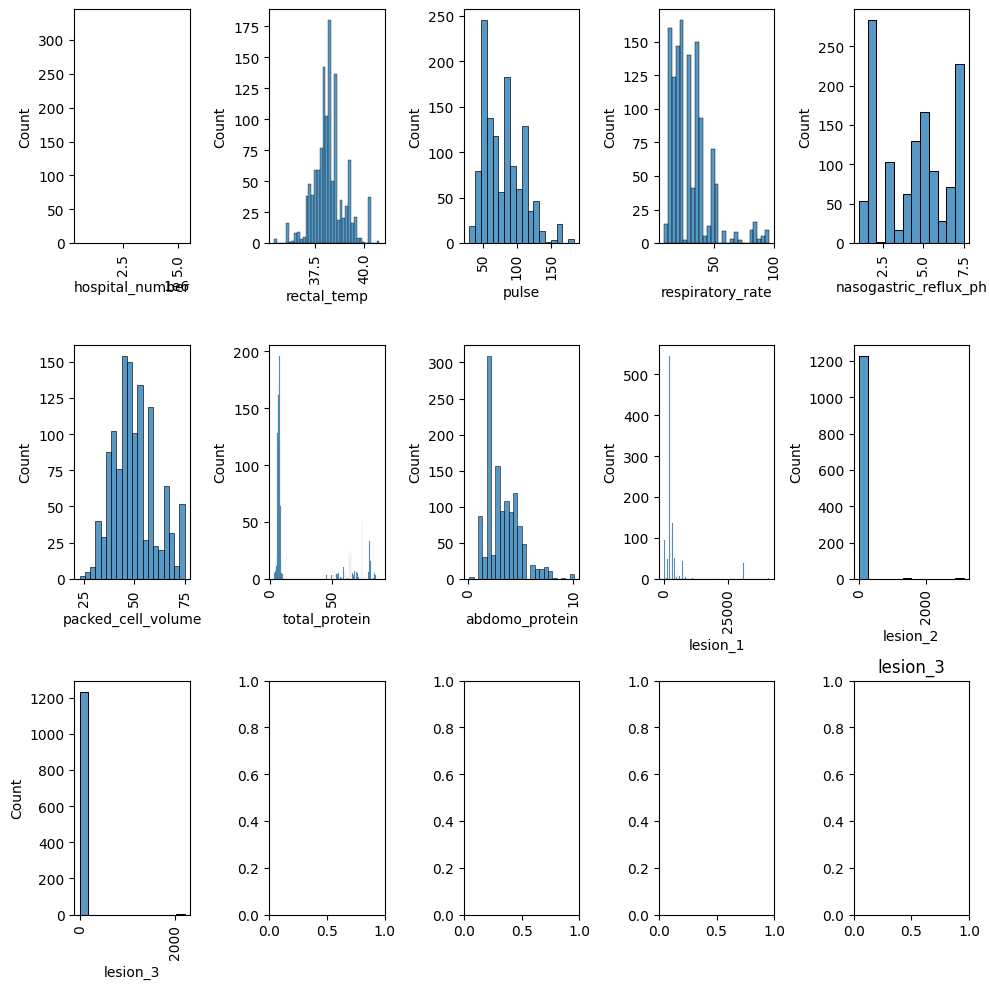

In [213]:
fig, axs=plt.subplots(3,5, figsize=(10,10))
for i, col in enumerate(num_col):
    sns.histplot(data=train, x=train[col], ax=axs[i//5, i%5])
    axs[i//5, i%5].tick_params(axis='x', rotation=90)
    plt.title(label=col, loc='center')
plt.tight_layout()
plt.show()

<Axes: >

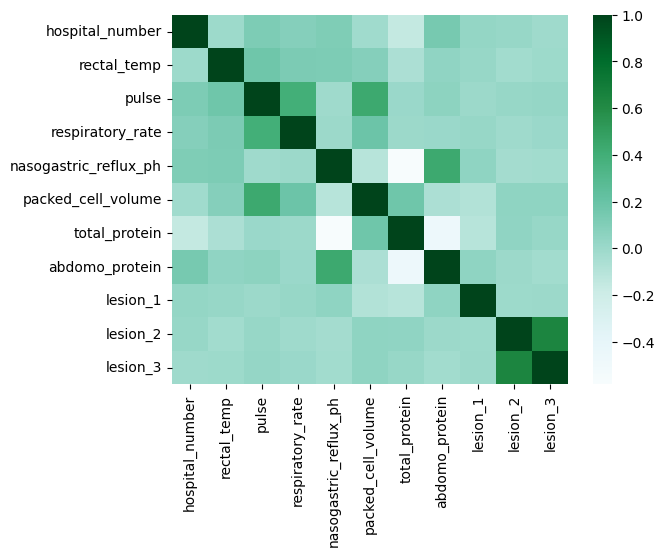

In [214]:
sns.heatmap(train[num_col].corr(), cmap="BuGn")

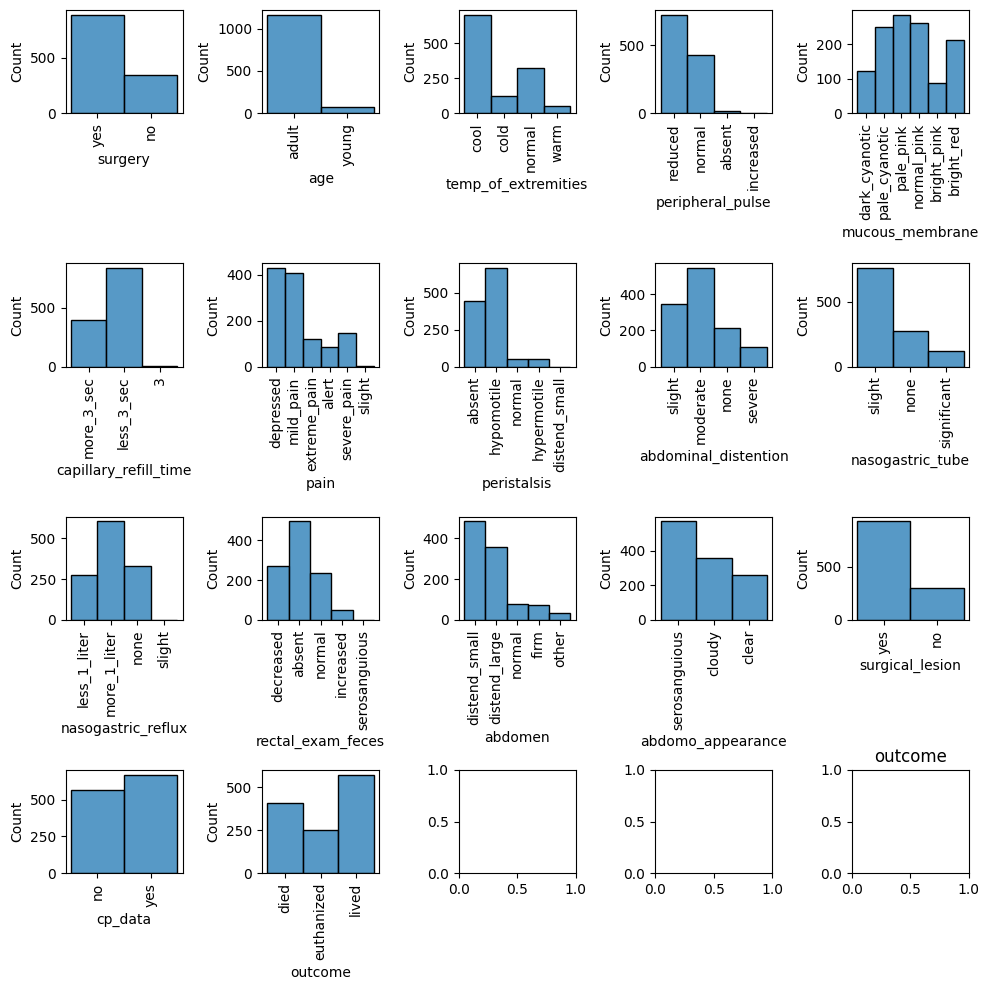

In [215]:
fig, axs=plt.subplots(4,5, figsize=(10,10))
for i, col in enumerate(cat_col):
    sns.histplot(data=train, x=train[col], ax=axs[i//5, i%5])
    axs[i//5, i%5].tick_params(axis='x', rotation=90)
    plt.title(label=col, loc='center')
plt.tight_layout()
plt.show()

In [216]:
for col in train.columns:
    train[col].fillna(train.mode().loc[0,col], inplace=True)

train.isna().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

Data Split & fitting
====================

In [217]:
train.iloc[:,:-1]

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,distend_large,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,distend_small,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,firm,40.0,5.9,cloudy,7.0,yes,400,0,0,yes
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,distend_small,58.0,74.0,cloudy,2.0,yes,2209,0,0,no


In [218]:
from sklearn.model_selection import train_test_split

X=train.loc[:,num_col]
y=train.iloc[:,-1]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.1, shuffle=True)

X_train.reset_index()
X_test.reset_index()
y_train.reset_index()
y_test.reset_index()

X_train.shape, y_train.shape


((1111, 11), (1111,))

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score

skf=StratifiedKFold(n_splits=5, shuffle=True)
clf=RandomForestClassifier(n_estimators=100)
for i, (train_idx, vaild_idx) in enumerate(skf.split(X_train,y_train)):
    clf.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_pred=clf.predict(X_train.iloc[vaild_idx])
    print(f'fold {i} score:', precision_score(y_true=y_train.iloc[vaild_idx], y_pred=y_pred, average='weighted'))


fold 0 score: 0.6813940592454923
fold 1 score: 0.7158625915635262
fold 2 score: 0.664098765740764
fold 3 score: 0.6482388681431089
fold 4 score: 0.6712457587457589


In [220]:
sample_submission.head()

,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
3,1238,euthanized
4,1239,lived


In [221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     824 non-null    int64  
 1   surgery                824 non-null    object 
 2   age                    824 non-null    object 
 3   hospital_number        824 non-null    int64  
 4   rectal_temp            824 non-null    float64
 5   pulse                  824 non-null    float64
 6   respiratory_rate       824 non-null    float64
 7   temp_of_extremities    789 non-null    object 
 8   peripheral_pulse       777 non-null    object 
 9   mucous_membrane        811 non-null    object 
 10  capillary_refill_time  818 non-null    object 
 11  pain                   795 non-null    object 
 12  peristalsis            805 non-null    object 
 13  abdominal_distention   802 non-null    object 
 14  nasogastric_tube       760 non-null    object 
 15  nasoga

In [222]:
def test_data(data):
    num_col=[x  for x in data.columns if np.dtype(data[x])!=object]
    cat_col=[x  for x in data.columns if (np.dtype(data[x])==object)]

    num_col.remove('id')
    
    for col in data.columns:
        data[col].fillna(data.mode().loc[0,col], inplace=True)
    
    return data.loc[:,num_col]

In [223]:
y_submit=clf.predict(test_data(test))

sample_submission=pd.DataFrame(data=y_submit, columns=['outcome'], index=test.id)
sample_submission.to_csv('sample_submission.csv')


Categorical data - OneHotEncoding
===================================

In [228]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def rfmodel_OHE(data, test):
    num_col=[x  for x in data.columns if np.dtype(data[x])!=object]
    cat_col=[x  for x in data.columns if (np.dtype(data[x])==object)]

    num_col.remove('id')
    cat_col.remove('outcome')

    for col in data.columns:
        data[col].fillna(data.mode().loc[0,col], inplace=True)
    for col in num_col+cat_col:
        test[col].fillna(data.mode().loc[0,col], inplace=True)
        
    global ohe
    ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    ohe.fit(data.loc[:,cat_col])
    X_train=pd.concat([data.loc[:,num_col],pd.DataFrame(ohe.transform(data.loc[:,cat_col]))], axis=1)
    X_train.columns=X_train.columns.astype(str)
    print(X_train.shape, X_train.columns)
    y_train=data.loc[:,'outcome']
    X_test=pd.concat([test.loc[:,num_col],pd.DataFrame(ohe.transform(test.loc[:,cat_col]))], axis=1)
    X_test.columns=X_test.columns.astype(str)
        
    skf=StratifiedKFold(n_splits=5, shuffle=True)
    clf=RandomForestClassifier(n_estimators=100)
    for i, (train_idx, vaild_idx) in enumerate(skf.split(X_train,y_train)):
        clf.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
        y_pred=clf.predict(X_train.iloc[vaild_idx])
        print(f'fold {i} score:', accuracy_score(y_true=y_train.iloc[vaild_idx], y_pred=y_pred))
    
    y_submit=clf.predict(X_test)

    sample_submission=pd.DataFrame(data=y_submit, columns=['outcome'], index=test.id)
    sample_submission.to_csv('sample_submission.csv')


In [229]:
rfmodel_OHE(train, test)

(1235, 71) Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59'],
      dtype='object')
fold 0 score: 0.6761133603238867
fold 1 score: 0.6761133603238867
fold 2 score: 0.7044534412955465
fold 3 score: 0.728744939271255
fold 4 score: 0.6963562753036437


PCA decomposition
=================

In [ ]:
a=pd.DataFrame(np.ones([1,3]), columns=[1,2,3])

In [ ]:
print(a.columns)

Index([1, 2, 3], dtype='int64')
